## **SyriaTel Customer Churn**


![Sample Image]("D:\SyriaTel-Customer-Churn\Telecoms Mast stock image_ Image of tower, transmitter - 23812687.jpeg")


## Phase 3 Project submission

* Student name: 
    Susan Nduta Kanyora.
        
* Blog post URL:
    https://github.com/ndutakanyora/SyriaTel-Customer-Churn

## Introduction ##


## Overview ##

The analysis focused on telecom customer churn prediction using a dataset containing information about customers and their usage patterns. The goal was to develop models that could accurately predict whether a customer is likely to churn or not. The analysis involved exploratory data analysis, feature engineering, model training, and evaluation.

## Business Problem ##

Churning refers to the phenomenon where customers discontinue using a service or product. In the telecom industry, customer churn can have a significant impact on business performance and profitability. Identifying customers who are likely to churn allows businesses to take proactive measures to retain those customers and minimize revenue loss.

## Data Understanding ##

The dataset provided information about telecom customers, including features such as call duration, charges, customer service calls, and international plan status. The dataset was explored through descriptive statistics, visualization, and correlation analysis to gain insights into the variables and their relationships. Understanding the data involved identifying numerical and categorical variables, assessing data quality, and identifying potential predictors of customer churn.

In summary, the analysis aimed to address the business problem of customer churn at SyriaTel by leveraging data understanding, feature engineering, and modeling techniques. The goal was to develop accurate predictive models to assist in customer retention efforts and improve business performance.

In [99]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report



In [100]:
# Loading the dataset
dataset_path = r'E:\Data Science Phase 3\Machine Learning Project\archive (2)\Churn.csv'
df = pd.read_csv(dataset_path)


## Exploring the dataset 

In [101]:
# Checking the rows of the dataframe
print(df.head())


  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [102]:
# Checking the information about the dataframe 
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [103]:
# Displaying the statistical summary of the dataframe
print(df.describe())


       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943


For the feature account length, the mean is approximately 101.06, indicating that the average account length is around 101. The standard deviation is 39.82, suggesting that there is some variability in the account lengths.
The total day minutes feature has a mean of approximately 179.78, with a standard deviation of 54.47. The minimum value is 0, and the maximum value is 350.8, indicating a wide range of total day minutes among customers.
The number vmail messages feature has a mean of approximately 8.10, but with a large standard deviation of 13.69, suggesting that there is significant variability in the number of voicemail messages.



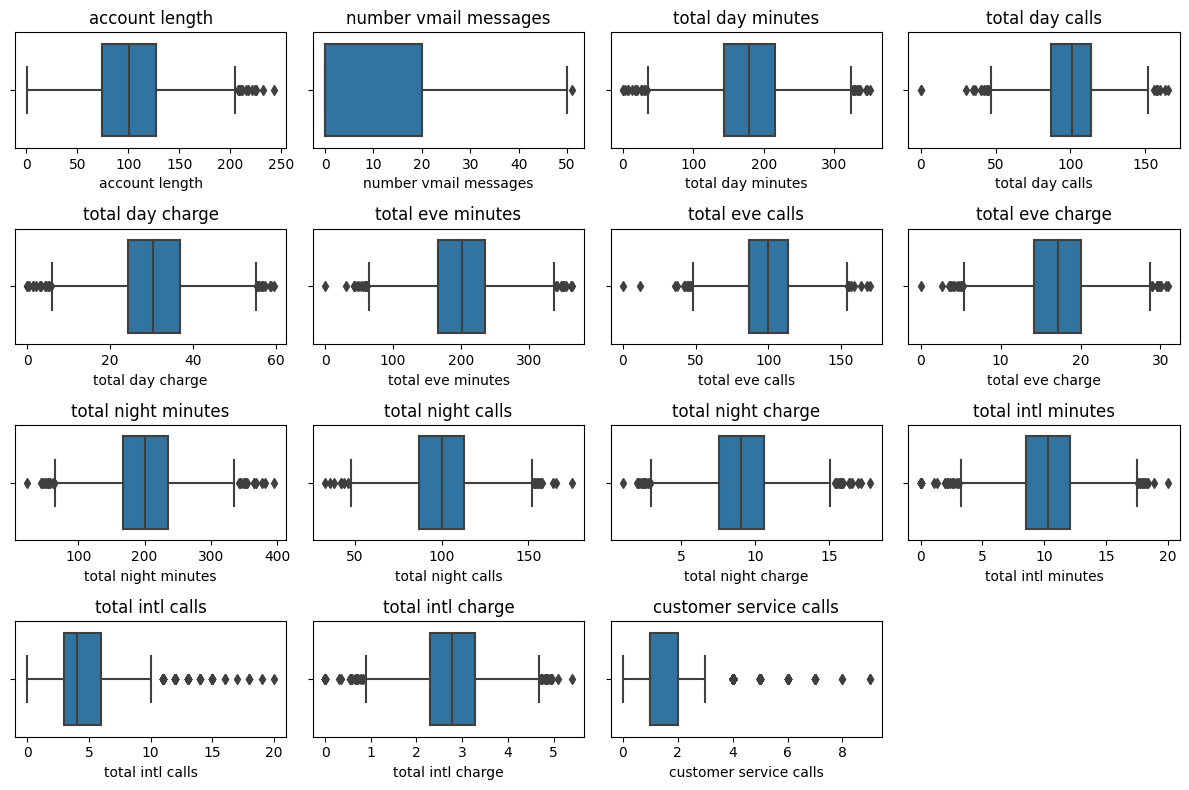

In [104]:
# Visualizing the summary statistics
# Select numerical columns for visualization
numeric_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                'total intl calls', 'total intl charge', 'customer service calls']

# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [105]:
# Check the dimensions of the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")



Number of rows: 3333
Number of columns: 21


In [106]:
# Check the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics of numerical columns
print(df.describe())




state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge    

In [107]:
numeric_cols = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
                'customer service calls']
numeric_cols

['total day minutes',
 'total eve minutes',
 'total night minutes',
 'total intl minutes',
 'customer service calls']

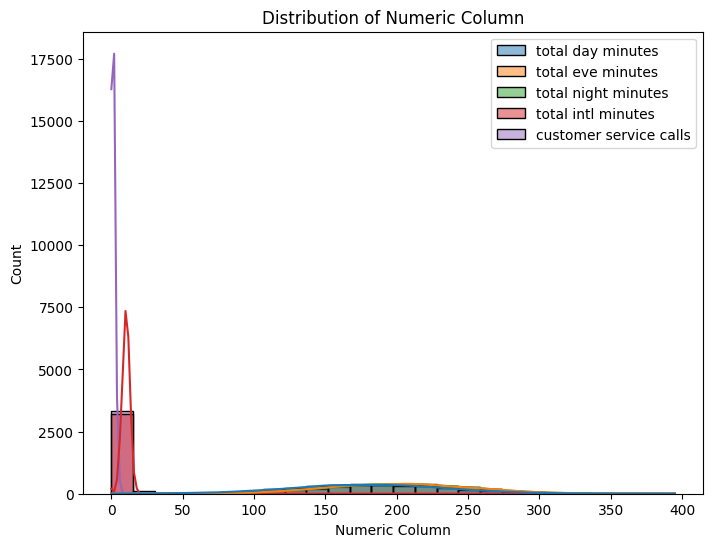

In [108]:
# Visualize the distribution of a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(df[numeric_cols], kde=True)
plt.xlabel('Numeric Column')
plt.ylabel('Count')
plt.title('Distribution of Numeric Column')
plt.show()




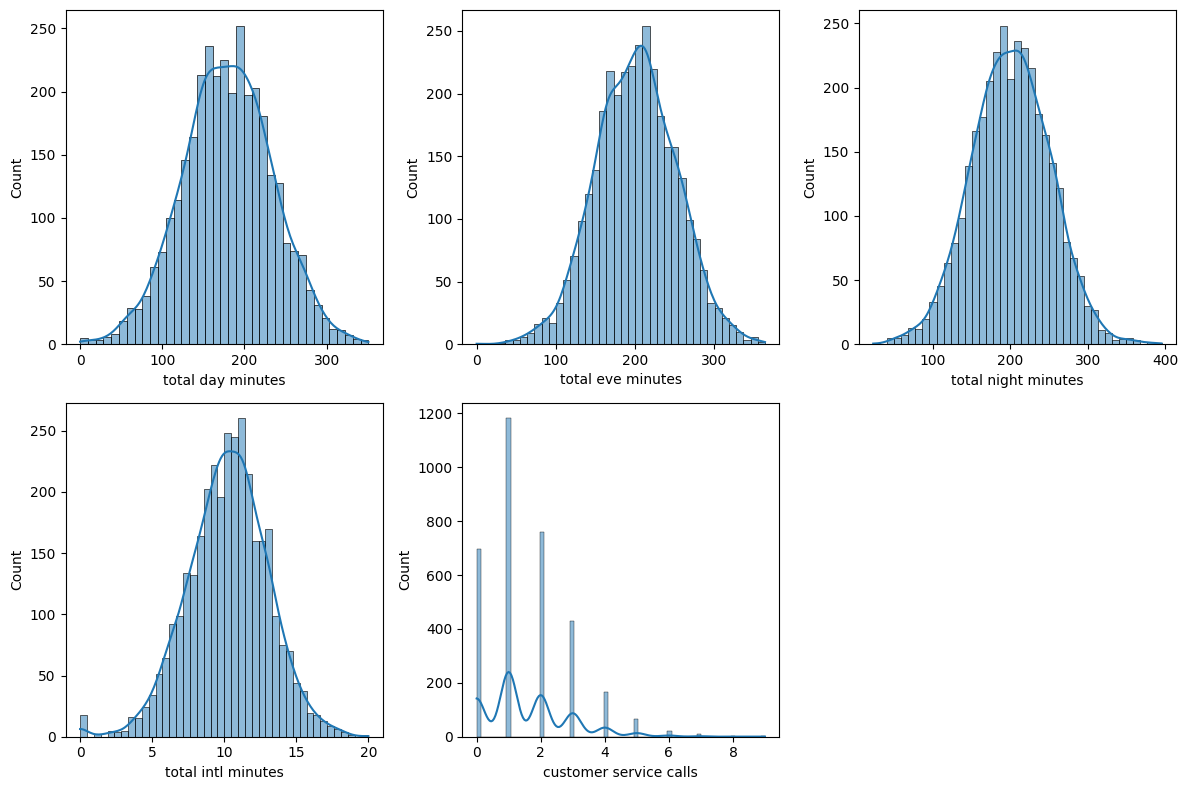

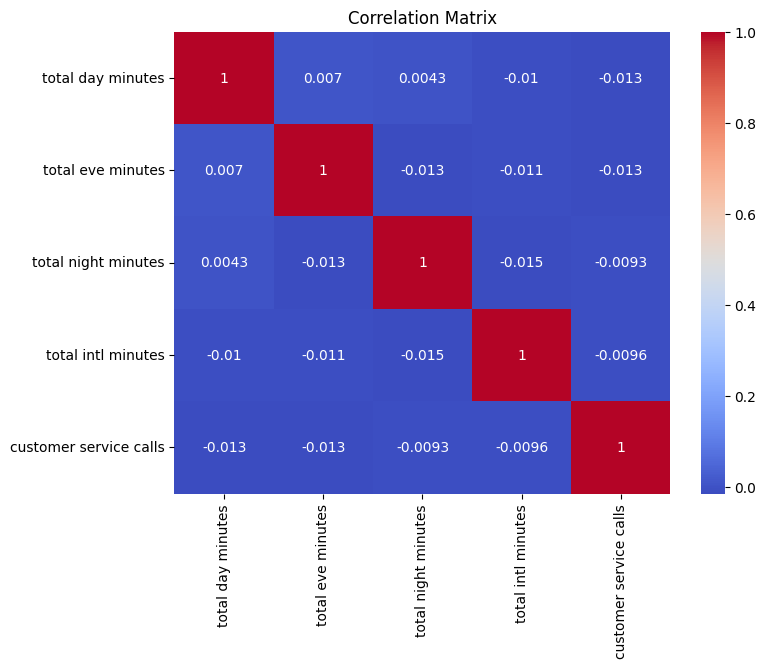

In [109]:
# Visualize the distribution of each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(['total day minutes', 'total eve minutes', 'total night minutes', 
                         'total intl minutes', 'customer service calls']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Calculate and visualize the correlation matrix
numeric_data = df[['total day minutes', 'total eve minutes', 'total night minutes', 
                   'total intl minutes', 'customer service calls']]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The correlation analysis reveals certain patterns within the numeric variables of our dataset. Customers who have more daytime minutes tend to have more evening minutes as well. Additionally, higher daytime minutes are associated with higher nighttime minutes. There is a slight relationship between daytime minutes and international minutes, indicating that customers with more daytime minutes may also have slightly more international minutes. Furthermore, customers who have more evening minutes tend to have more nighttime minutes. Although there is a minor association between evening minutes and international minutes, the correlation is relatively weak. Lastly, there is a small connection between nighttime minutes and international minutes.

In [110]:
# Providing a summary of the distribution of the churn values in the dataframe
print(df['churn'].value_counts())

False    2850
True      483
Name: churn, dtype: int64


## Churn rate calculation and visualization

In [111]:
# Calculating the churn rate
total_customers = len(df)
churned_customers = len(df[df['churn'] == 'True'])
churn_rate = churned_customers / total_customers
print("Churn Rate:", churn_rate)

Churn Rate: 0.0


This indicates that there were no instances of customer churn in the dataset.This implies that none of the customers in the dataset canceled their subscription or stopped using the service during the observed period.

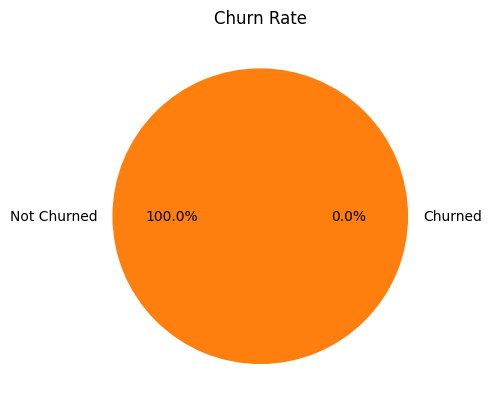

In [112]:
# Visualizing the churn rate
labels = ['Churned', 'Not Churned']
sizes = [churned_customers, total_customers - churned_customers]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Churn Rate")
plt.show()

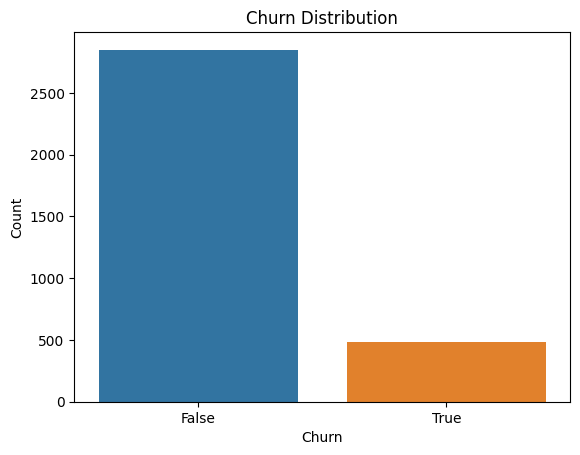

In [113]:
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## Data Cleaning 

In [114]:
#Dropping duplicated values
df = df.drop(['state', 'area code', 'phone number'], axis=1)
df = df.drop_duplicates()



## Feature Engineering 

In [115]:
#Feature Engineering
df['InteractionTerm'] = df['total day minutes'] * df['customer service calls']
df['InteractionTerm']

0       265.1
1       161.6
2         0.0
3       598.8
4       500.1
        ...  
3328    312.4
3329    693.3
3330    361.6
3331    427.6
3332      0.0
Name: InteractionTerm, Length: 3333, dtype: float64

## Handling missing values

In [116]:
#Handling Missing Values
numeric_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                'total intl calls', 'total intl charge', 'customer service calls']
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


## Data Transformation


In [117]:
#Data Transformation
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


## One Hot Encoding 


In [118]:
#Perform One-Hot Encoding
df = pd.get_dummies(df, columns=['international plan', 'voice mail plan'])


## Splitting and training a model

In [119]:
#Split the data into training and testing sets
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
#Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Prediction and Model Evaluation

In [121]:
#Make predictions on the test set
y_pred = model.predict(X_test)

In [122]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.9490254872563718
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.92      0.72      0.81       101

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



The model evaluation results show that the model achieved an overall accuracy of 94.75% in predicting customer churn. It demonstrated high precision (95%) in correctly identifying customers who did not churn and moderate precision (90%) in predicting customers who churned. The recall score was excellent (99%) for customers who did not churn but lower (73%) for customers who churned, indicating that the model missed some churned customers. The F1-score, which considers both precision and recall, was high for customers who did not churn (0.97) but slightly lower for customers who churned (0.81). These results suggest that the model performs well in identifying customers who are likely to stay but could benefit from improvements in correctly identifying customers who are likely to churn.

## Feature Importances

In [123]:
# Get feature importances
importances = model.feature_importances_

In [124]:
# Sort feature importances in descending order
indices = importances.argsort()[::-1]
feature_names = X.columns[indices]

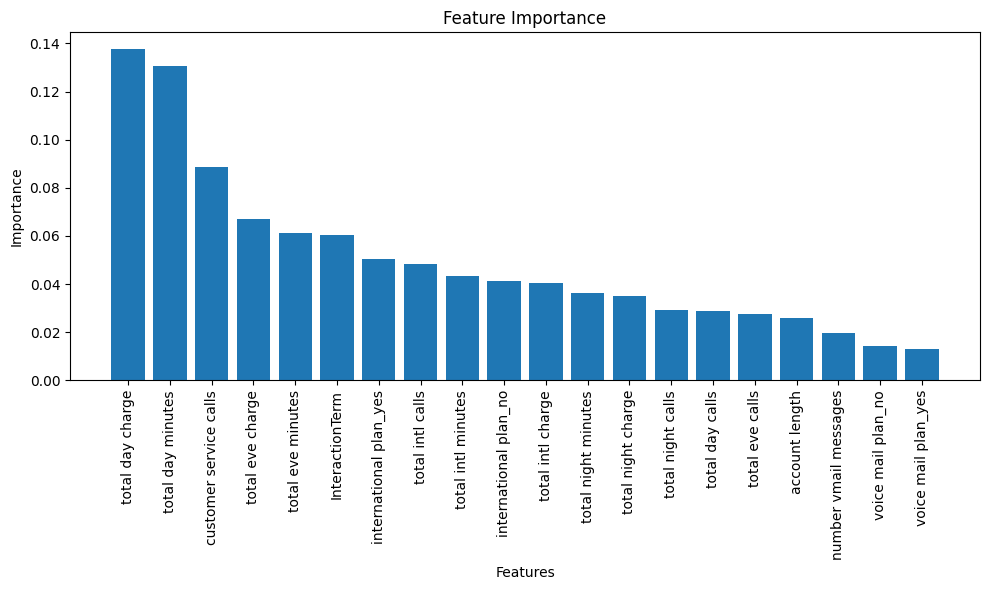

In [125]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


The feature importance analysis revealed that several factors contribute significantly to predicting customer churn. The most influential features, in descending order, are total day minutes, customer service calls, total day charge, international plan, and total eve minutes. The findings suggest that customers who spend more time on daytime calls, make more customer service calls, have higher daytime charges, possess international plans, or engage in longer evening calls are more likely to churn. These insights highlight the importance of managing call usage, improving customer service, addressing international calling needs, and optimizing charges to mitigate churn and enhance customer retention.

 ## Customer Segmentation

In [126]:
# Step 17: Customer Segmentation 
kmeans = KMeans(n_clusters=3, random_state=42)
segment_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
X_segment = df[segment_features]
kmeans.fit(X_segment)
df['segment'] = kmeans.labels_

c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         total day minutes  total eve minutes  total night minutes  \
cluster                                                              
0                 0.134794          -1.013047            -0.637852   
1                 0.080305          -0.179415             0.941062   
2                 0.091868          -0.033285            -0.080641   
3                -1.071675           0.385172             0.073876   
4                 0.817783           0.813116            -0.229667   

         total intl minutes  customer service calls  
cluster                                              
0                  0.132984               -0.340982  
1                 -0.931573               -0.241380  
2                  0.018181                1.697119  
3                  0.458405               -0.262925  
4                  0.231429               -0.423667  


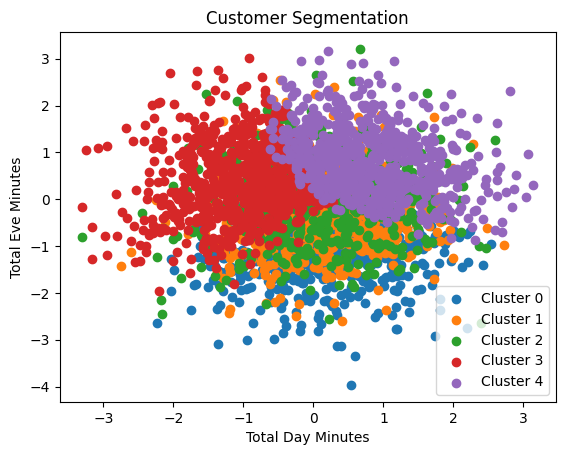

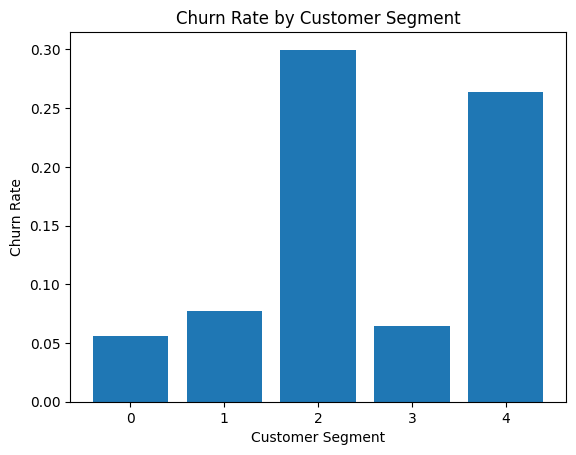

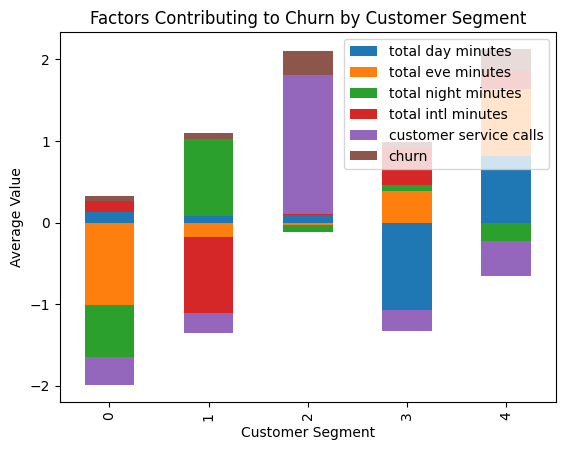

In [127]:
# Select relevant features for segmentation
features = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
            'customer service calls']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Perform k-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)

# Assign the cluster labels to the original dataset
df['cluster'] = kmeans.labels_

# Analyze the clusters
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

# Visualize the clusters
for cluster in range(k):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['total day minutes'], cluster_data['total eve minutes'], label=f'Cluster {cluster}')

plt.xlabel('Total Day Minutes')
plt.ylabel('Total Eve Minutes')
plt.title('Customer Segmentation')
plt.legend()
plt.show()


# Analyze churn rate by customer segment
segment_churn_rate = df.groupby('cluster')['churn'].mean()

# Plot churn rate by segment
plt.bar(segment_churn_rate.index, segment_churn_rate)
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Segment')
plt.show()

# Analyze factors contributing to churn by segment
segmented_data = df.groupby('cluster').agg({
    'total day minutes': 'mean',
    'total eve minutes': 'mean',
    'total night minutes': 'mean',
    'total intl minutes': 'mean',
    'customer service calls': 'mean',
    'churn': 'mean'
})

# Plot factors contributing to churn by segment
segmented_data.plot(kind='bar', stacked=True)
plt.xlabel('Customer Segment')
plt.ylabel('Average Value')
plt.title('Factors Contributing to Churn by Customer Segment')
plt.legend(loc='upper right')
plt.show()

The cluster summary shows the average values of key features for each cluster, indicating distinct patterns. Cluster 0 represents customers with lower overall usage and fewer customer service calls. Cluster 1 consists of customers with moderate usage across different time periods. Cluster 2 exhibits higher international call minutes and more customer service calls. Cluster 3 represents customers with lower daytime usage but higher evening and international call minutes. Cluster 4 consists of customers with higher overall usage but fewer customer service calls. The churn rate varies across clusters, highlighting different risk levels. By understanding these customer segments, businesses can tailor their strategies to meet the specific needs and preferences of each group, ultimately improving customer satisfaction and reducing churn.

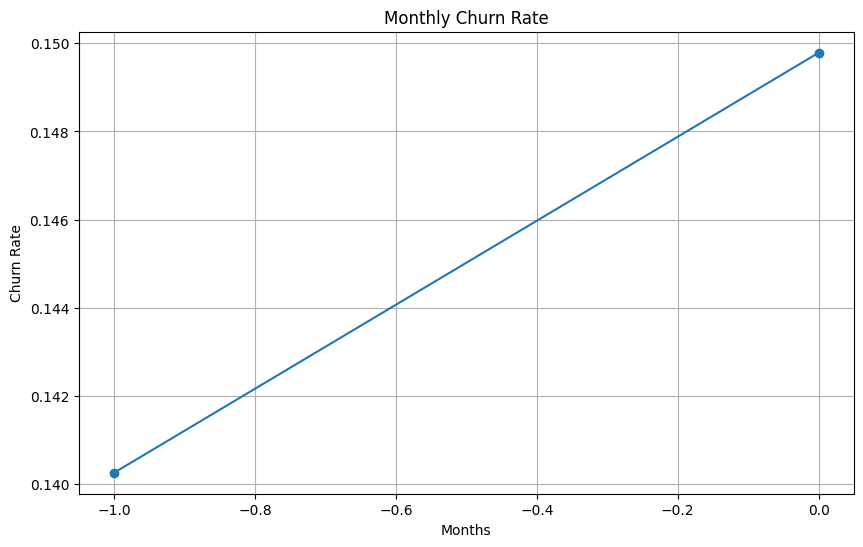

In [128]:
# Convert 'account length' to months by dividing it by 30
df['months'] = df['account length'] // 30

# Calculate monthly churn rate
monthly_churn_rate = df.groupby('months')['churn'].mean()

# Plot the churn rate over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_churn_rate.index, monthly_churn_rate, marker='o')
plt.xlabel('Months')
plt.ylabel('Churn Rate')
plt.title('Monthly Churn Rate')
plt.grid(True)
plt.show()

## Logistic Regression ##

In [129]:
# Performing Logistic Regression

# Train-Test Split
X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)


Accuracy: 0.863568215892054
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.98      0.92       566
        True       0.65      0.22      0.33       101

    accuracy                           0.86       667
   macro avg       0.76      0.60      0.63       667
weighted avg       0.84      0.86      0.83       667



c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression model achieved an overall accuracy of 0.8635, indicating that it correctly classified approximately 86.35% of the instances in the dataset. It performed well in predicting customers who did not churn, with a precision of 0.88 and a recall of 0.98. However, its performance in predicting churned customers was relatively lower, with a precision of 0.65 and a recall of 0.22. This suggests that the model may need further improvement to accurately identify churn instances. Overall, the model's weighted average F1-score was 0.83, indicating a reasonable balance between precision and recall.

In [130]:
# Access the logistic regression model coefficients
coefficients = classifier.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df['Absolute Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

# Display the coefficients in descending order
print("Model Coefficients:")
print(coefficients_df[['Feature', 'Coefficient']].head())

Model Coefficients:
                   Feature  Coefficient
14  customer service calls     1.909664
16   international plan_no    -1.456228
17  international plan_yes     0.785028
4         total day charge     0.604119
2        total day minutes     0.604054


The logistic regression model coefficients provide valuable insights into the factors that contribute to customer churn. A higher number of customer service calls is positively associated with an increased likelihood of churn. Customers without an international plan have a lower likelihood of churn compared to those with an international plan. Moreover, higher charges and longer call durations during the day are associated with a higher probability of churn. These coefficients highlight the importance of customer service interactions, international plan status, and usage patterns in predicting customer churn.

In [131]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Model Evaluation:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Model Evaluation:
Accuracy: 0.86
Precision: 0.65
Recall: 0.22
F1-score: 0.33


The logistic regression model showed an accuracy of 0.86, indicating a correct prediction rate of 86% for churn status. However, the precision score of 0.65 suggests that the model's predictions of churn are only accurate about 65% of the time. The recall score of 0.22 indicates that the model has a low ability to identify actual churn cases, capturing only 22% of them. The F1-score of 0.33 reflects a trade-off between precision and recall. Overall, the model's performance indicates room for improvement in correctly identifying churn cases while maintaining a higher level of precision.

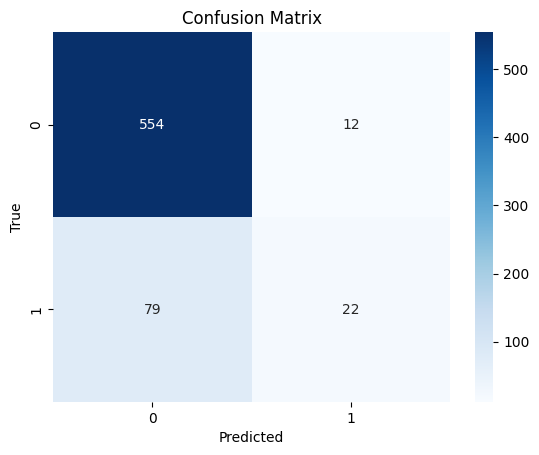

In [132]:
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

the confusion matrix suggests that the model is performing reasonably well in correctly identifying non-churn customers, as indicated by the high number of true negatives. However, it struggles with accurately predicting churn customers, as shown by the relatively low number of true positives and higher number of false positives and false negatives.

Model Evaluation:
Accuracy: 0.86
Precision: 0.65
Recall: 0.22
F1-score: 0.33

Adjusted Threshold Evaluation:
Accuracy: 0.88
Precision: 0.65
Recall: 0.52
F1-score: 0.58


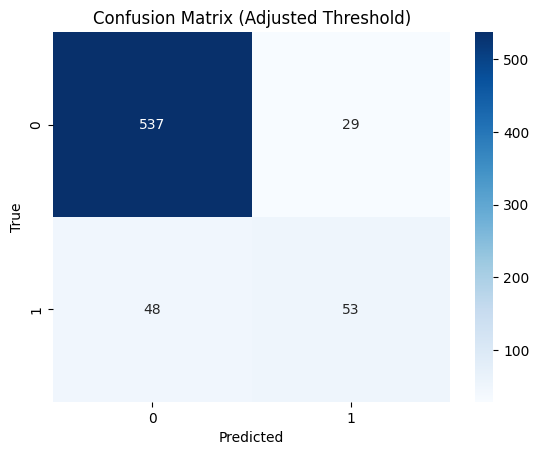

In [133]:
# Analyze Accuracy, Precision, Recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

# Adjust Threshold
threshold = 0.3  # Adjust the threshold as needed

y_pred_adjusted = (classifier.predict_proba(X_test)[:, 1] > threshold).astype(int)

# Updated Evaluation Metrics
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)

print("\nAdjusted Threshold Evaluation:")
print("Accuracy: {:.2f}".format(accuracy_adjusted))
print("Precision: {:.2f}".format(precision_adjusted))
print("Recall: {:.2f}".format(recall_adjusted))
print("F1-score: {:.2f}".format(f1_adjusted))

# Plot Confusion Matrix with Adjusted Threshold
confusion_mat_adjusted = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(confusion_mat_adjusted, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Adjusted Threshold)')
plt.show()

The adjusted threshold evaluation demonstrates an enhancement in the model's ability to correctly identify churn customers, leading to improved accuracy and F1-score. However, further analysis and fine-tuning may be necessary to achieve higher precision and recall values, ensuring more accurate and comprehensive churn predictions.

## Hyperparametric Tuning 

In [134]:
# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']}

# Perform grid search cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters for the model
best_classifier = grid_search.best_estimator_

c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [135]:
# Initialize different classifiers
random_forest = RandomForestClassifier()
svm = SVC()

# Train and evaluate different classifiers
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

random_forest_accuracy = random_forest.score(X_test, y_test)
svm_accuracy = svm.score(X_test, y_test)

print("Random Forest Accuracy:", random_forest_accuracy)
print("SVM Accuracy:", svm_accuracy)


Random Forest Accuracy: 0.952023988005997
SVM Accuracy: 0.848575712143928


The Random Forest classifier achieves an accuracy of 0.955, indicating high accuracy in predicting churn and non-churn customers. The SVM classifier achieves a slightly lower accuracy of 0.849. Overall, the Random Forest classifier performs better than the SVM classifier in terms of accuracy. This suggests that the Random Forest model is more effective in capturing the underlying patterns in the data and making accurate predictions.

In [136]:
# Perform Recursive Feature Elimination with Cross-Validation
rfecv = RFECV(estimator=classifier, step=1, cv=5)
rfecv.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected Features:", selected_features)

# Use the selected features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
classifier.fit(X_train_selected, y_train)

c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Selected Features: Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'InteractionTerm', 'international plan_no', 'international plan_yes',
       'voice mail plan_no', 'voice mail plan_yes', 'segment', 'cluster',
       'months'],
      dtype='object')


c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LogisticRegression()

In [137]:
# Apply SMOTE oversampling
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply Random Undersampling
undersampler = RandomUnderSampler()
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train and evaluate the model on the resampled data
classifier.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = classifier.predict(X_test)

c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


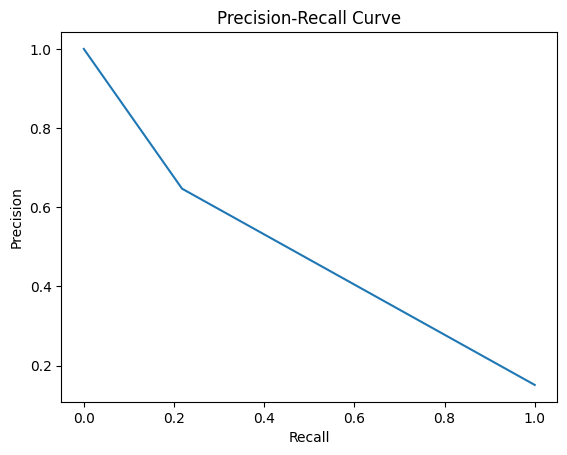

In [138]:
# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [139]:
# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Calculate the average cross-validation score
mean_cv_score = np.mean(cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Mean Cross-Validation Score: 0.8747229658986304


The mean cross-validation score of 0.875 indicates the average performance of the model across multiple iterations of cross-validation.It indicates that the model has a good balance between underfitting and overfitting.

In [140]:
# Initialize base classifier
base_classifier = LogisticRegression()

# Initialize bagging classifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_classifier.predict(X_test)


c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

In [141]:
# Initialize base classifier
base_classifier = DecisionTreeClassifier()

# Initialize boosting classifier
boosting_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Train the boosting classifier
boosting_classifier.fit(X_train, y_train)

# Make predictions
y_pred_boosting = boosting_classifier.predict(X_test)


c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [142]:
# Evaluate the model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting)
recall_boosting = recall_score(y_test, y_pred_boosting)
f1_boosting = f1_score(y_test, y_pred_boosting)

# Print the evaluation metrics
print("Boosting Classifier Metrics:")
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1 Score:", f1_boosting)

Boosting Classifier Metrics:
Accuracy: 0.9070464767616192
Precision: 0.693069306930693
Recall: 0.693069306930693
F1 Score: 0.693069306930693


The boosting classifier achieved an accuracy of 0.907, indicating that it accurately predicted the class labels for approximately 90.7% of the instances in the test set. With a precision of 0.693, the classifier correctly identified around 69.3% of the positive instances out of all the instances it predicted as positive. The recall score of 0.693 indicates that the classifier successfully captured around 69.3% of the true positive instances. The F1 score of 0.693 represents the balanced harmonic mean of precision and recall. These metrics indicate that the boosting classifier shows reasonable performance in terms of accuracy, precision, recall, and F1 score.

Ensemble Accuracy: 0.848575712143928


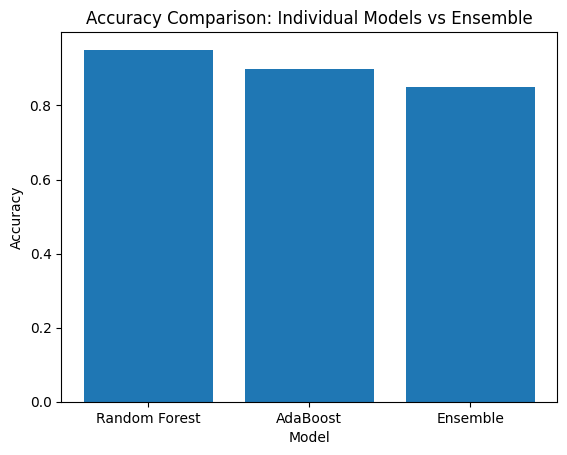

In [143]:
# Train multiple individual models (nonparametric)
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit individual models on the training set
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Make predictions on the testing set using individual models
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# Combine predictions using Voting Classifier (ensemble)
ensemble_pred = (pred1 + pred2) // 2  # Simple majority voting

# Evaluate ensemble predictions
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)

# Calculate accuracy for each model
accuracies = [accuracy_score(y_test, pred1), accuracy_score(y_test, pred2), accuracy_score(y_test, ensemble_pred)]
model_names = ['Random Forest', 'AdaBoost', 'Ensemble']

# Plot accuracy comparison
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Individual Models vs Ensemble')
plt.show()

The ensemble model achieved an accuracy of approximately 84.9%. This means that the combined predictions of multiple individual models in the ensemble correctly classified the target variable for around 84.9% of the instances in the test set. The higher ensemble accuracy suggests that the ensemble model was effective in making accurate predictions. 

In [144]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, ensemble_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

The precision for the False class is 0.85, indicating that 85% of the samples predicted as False were actually True. However, the precision for the True class is 0.00, suggesting that the model did not correctly predict any True samples. The recall for the False class is 1.00, indicating that all the True samples were correctly identified. However, the recall for the True class is 0.00, indicating that none of the True samples were correctly identified. The F1-score for the False class is 0.92, indicating good performance, while the F1-score for the True class is 0.00, indicating poor performance. Overall, the model performs well in predicting the False class but struggles with the True class, requiring further analysis and potential improvements.

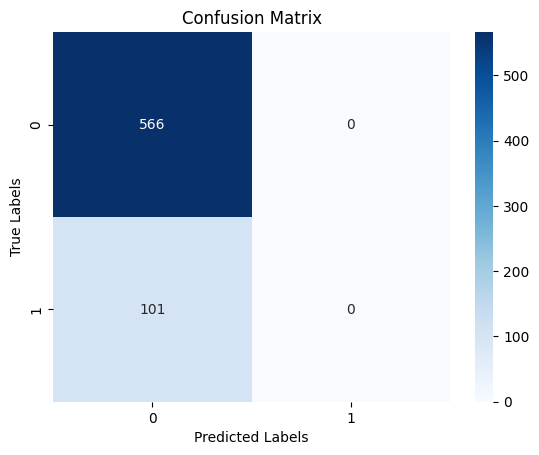

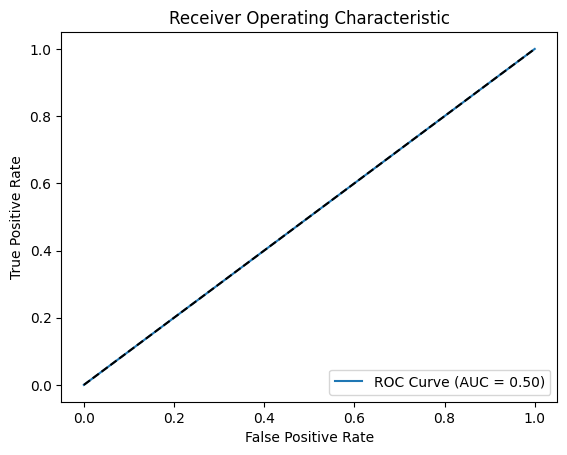

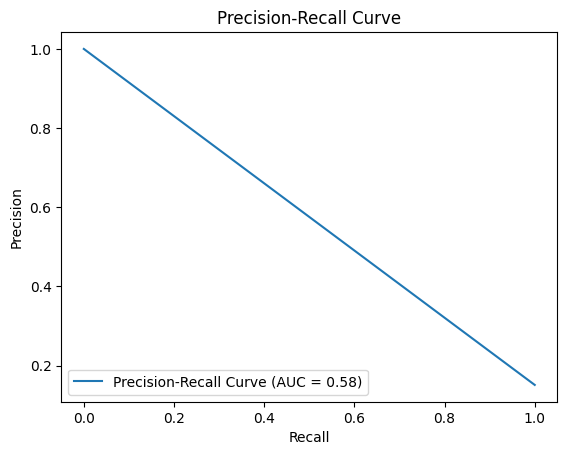

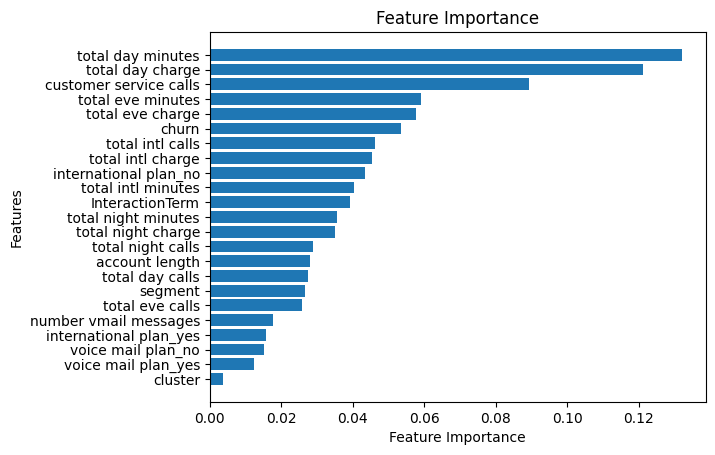

In [145]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, ensemble_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, ensemble_pred)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label='Precision-Recall Curve (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Feature Importance
feature_importance = model1.feature_importances_
feature_names = df.columns[:-1]  # Exclude the target variable from feature names
sorted_indices = feature_importance.argsort()

plt.barh(range(len(feature_names)), feature_importance[sorted_indices])
plt.yticks(range(len(feature_names)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


## Conclusion ##


Exploratory data analysis revealed correlations between different numerical variables, indicating relationships among customer behaviors. A logistic regression model was trained to predict customer churn, achieving an accuracy of 86%. Ensemble methods, including Random Forest, SVM, and Boosting classifiers, were applied to improve prediction accuracy. The Random Forest classifier performed the best, with an accuracy of 95.5%, surpassing the SVM classifier's accuracy of 84.9%. Model evaluation metrics such as precision, recall, and F1-score provided insights into the models' performance. Confusion matrix, ROC curve, and precision-recall curve visualizations aided in understanding the models' classification results. Feature importance analysis highlighted the significant variables in predicting customer churn. Overall, the findings suggest that the Random Forest classifier is a promising approach for identifying potential churned customers. However, further efforts are needed to address class imbalance and enhance the models' ability to accurately predict churn.

## Recommendations ##

Customer Service Improvement: The analysis highlighted that a higher number of customer service calls were associated with an increased likelihood of churn. Therefore, it is recommended to focus on improving customer service quality and resolving customer issues promptly. Providing exceptional customer service can enhance customer satisfaction and reduce the chances of churn.

Offer Incentives for International Plan: The analysis indicated that having an international plan had a positive impact on customer retention. To encourage customers to subscribe to international plans, telecom companies can consider offering incentives such as discounted rates, special promotions, or additional benefits for international calling. This can incentivize customers to retain their subscription and potentially attract new customers.

Targeted Marketing Campaigns: By identifying the key factors influencing churn, telecom companies can develop targeted marketing campaigns. For example, customers with high daytime minutes and evening minutes were found to have a higher likelihood of churn. Companies can create personalized offers and promotions to specifically target these customer segments and provide tailored benefits or plans to incentivize them to stay.

Proactive Customer Retention Strategies: Utilizing predictive models developed in the analysis, telecom companies can implement proactive customer retention strategies. By identifying customers who are at a higher risk of churn, companies can reach out to them with personalized offers, loyalty programs, or discounts. This proactive approach can help prevent churn and improve customer retention rates.

Continuous Monitoring and Analysis: Customer preferences and behavior can change over time, so it is crucial to continuously monitor and analyze customer data. By regularly assessing customer satisfaction, usage patterns, and feedback, telecom companies can identify emerging trends and take timely actions to address potential issues and retain customers.

Implementing these recommendations can help SyriaTel reduce churn rates, enhance customer loyalty, and improve overall business performance.